In [1]:
import os
import numpy as np
from matplotlib import pyplot as plt      
import pandas as pd
from scipy import special                 
import scipy.optimize as opt    
import array
from scipy.signal import find_peaks, peak_prominences, peak_widths
def unPackRawFile(raw_path):
    """
    - unpacks the .raw file. Not used for the neural network.
    """
    y = np.loadtxt(raw_path, skiprows=6)
    distance = y[:,0]
    pec_vel = y[:,1]
    temp = y[:,2]
    HI_density = y[:,3]
    gas_density = y[:,4]
    gas_metallicity = y[:,5]
   
    return distance, pec_vel, temp, HI_density, gas_density, gas_metallicity

(0.0, 0.005)

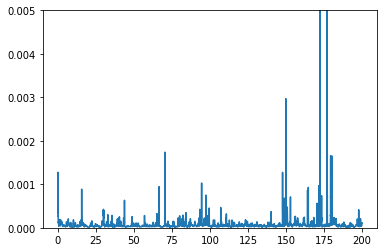

In [3]:
raw_path = 'los.00' + '{0:03}'.format(0) +'.raw'
distance, pec_vel, temp, HI_density, gas_density, gas_metallicity = unPackRawFile(raw_path)
plt.plot(distance,gas_density)
plt.ylim(0,0.005)

In [3]:
def display_data(x,y):
    # get from raw file some physical properties along the LOS
    # creating the simple plot of HI_density Vs. distance 
    fig = plt.figure(figsize=(20, 2))
    ax = fig.add_subplot(111)
    ax.plot(x,y)

In [4]:
def display_peak(x,y):
        # finding the peak in each of the graphs
        fig = plt.figure(figsize=(20, 2))
        ax = fig.add_subplot(111)
        ax.plot(x,y)
        #find peaks function from scipy after changing the width and prominence for better results, width is the bin? which is 1.75 chimps
        peak,properties = find_peaks(y)
        ax.plot(x[peak],y[peak],'bo')
        plt.show()


In [5]:
def display_lyman_peak(x,y,x1,y1):
    fig = plt.figure(figsize=(20, 2))
    ax = fig.add_subplot(111)
    ax.plot(x1, y1)
        #find peaks function from scipy after changing the width and prominence for better results, width is the bin? which is 1.75 chimps
    peak,properties = find_peaks(y1)
    ax.plot(x1[y],y1[y],'bo')
    plt.show()

In [6]:
def display_all():
    for i in range(5):
        raw_path = 'los.00' + '{0:03}'.format(i) +'.raw'
        distance, pec_vel, temp, HI_density, gas_density, gas_metallicity = unPackRawFile(raw_path)
        distance = distance * 0.1474 *3.086e24 /0.68
        ##scaling factor for chimp, this is in cm. is multiplied by the scale(listed on simulation data), the mpc, and h(hobble constant)
        display_data(distance,HI_density)
        display_peak(distance,HI_density)
        display_lyman_peak(all_distance[i],all_HI_density[i],distance,HI_density)

Below is the figure 1 we want to reproduce from the cosmological simulation paper, this time we are going to use the new simulation data

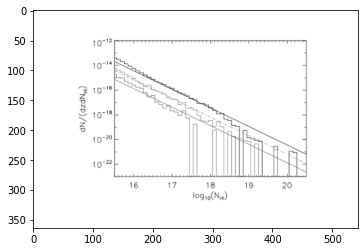

In [7]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('figure_1.png')
plt.imshow(img)
plt.show()


In [8]:
#below shows the graph and the peaks
#display_all()

we have that the Lyman-limit systems is at $$1.6 X 10^{17} cm^{-2}	\lesssim N_{HI} \lesssim 10^{20} cm^{-2}$$
Now we are going to convert the units and find the lyman limited systems within the line of sights

In [14]:

def area_under_peak():
    #declare the data that will store the peak location and the area and the lyman limited that are found
    column_names = ['id','xloc','NHI','left','right']
    area = pd.DataFrame(columns = column_names)
    #temp array for both peak location and density area
    location =[]
    density_area =[]
    lyman_limited_distance =[]
    lyman_limited_counts = []
    lyman_limited_value = []
    temp_HI_density = []
    temp_distance = []
    all_HI_density = []
    all_distance =[]
    
    distance_lls =[]
    area_under = []
    distance_left = []
    distance_right = []
    id = []
    counts_lyman_limited = 0
    for i in range(10):
        raw_path = 'los.00' + '{0:03}'.format(i) +'.raw'
        distance, pec_vel, temp, HI_density, gas_density, gas_metallicity = unPackRawFile(raw_path)
        #changing the distance from chimp to cmeters
        distance_cm = distance *0.1474*3.086e24 /0.68
        peak,properties = find_peaks(HI_density)
        mins, properties =find_peaks(HI_density*-1)
        closest_mins = [mins[np.argmin(np.abs(x-mins))] for x in peak]
        prominences, left_bases, right_bases = peak_prominences(HI_density,peak)
        width = peak_widths(HI_density,peak)
        counts_lyman_limited = 0
        #calculating area under the curve by multiplying the peak value by half of its width, assuming is peak is close to normally distributed
        #append to the lyman_limited series if conditions are satisfied
        #z,w are what is in the base corrsponsds to what value
        counts = 0
        temp_HI_density = []
        temp_distance = []
        previous = 0
        for k,z,w,x in zip(peak,right_bases,left_bases,closest_mins): 
            area_under_the_curve = np.multiply(HI_density[k], abs(distance_cm[k]-distance_cm[x]))/0.937415
            counts +=1
            if(distance[k] == 172.16986):
                print('left')
                print(w)
                print(distance[w])
                print('right')
                print(z)
                print(distance[z])
                print('peak')
                print(k)
                print(distance[k])
            #checking the condition
            if(area_under_the_curve >= (1.6*10**17)and area_under_the_curve  <= (10**22) and HI_density[k]/(gas_density[k]) > 1e-3 and (HI_density[x]/(gas_density[x]) < 1e-3 or HI_density[k-x+k]/(gas_density[k-x+k]) < 1e-3)):
                previous = distance[k]
                lyman_limited_value.append(area_under_the_curve)
                id.append(i)
                distance_lls.append(distance[k])
                area_under.append(area_under_the_curve)
                distance_left.append(distance[w])
                distance_right.append(distance[z])
                
                lyman_limited_distance.append([i,distance[z],counts])
                temp_distance.append(distance[k])
                temp_HI_density.append(k)
                #count the lyman_limited per sight
                counts_lyman_limited += 1
        lyman_limited_counts.append(counts_lyman_limited)
        all_distance.append(temp_distance)
        all_HI_density.append(temp_HI_density)
        density_area.append(HI_density[peak])
        location.append(distance[peak])
    area['id'] = id
    area['xloc'] = distance_lls
    area['NHI'] = area_under
    area['left'] = distance_left
    area['right'] = distance_right
    return all_HI_density,left_bases,right_bases,area,lyman_limited_distance,lyman_limited_counts,all_distance,lyman_limited_value
all_HI_density,left_bases,right_bases,area,lyman_limited_distance,lyman_limited_counts,all_distance,lyman_limited_value = area_under_peak()


left
3796
76.97643
right
9204
173.84818
peak
9035
172.16986


In [9]:

def area_under_peak():
    for i in range(10):
        raw_path = 'los.00' + '{0:03}'.format(i) +'.raw'
        distance, pec_vel, temp, HI_density, gas_density, gas_metallicity = unPackRawFile(raw_path)
        #changing the distance from chimp to cmeters
        distance_cm = distance *0.1474*3.086e24 /0.68
        peak,properties = find_peaks(HI_density)
        mins, properties =find_peaks(HI_density*-1)
        data = []
        closest_mins = [mins[np.argmin(np.abs(x-mins))] for x in peak]
        for i in range(len(closest_mins)-1): 
            left_bases = 0
            right_bases = 0
            ## no multiple peaks:
            if((HI_density[closest_mins[i]]/gas_density[closest_mins[i]] < 1e-3 and HI_density[closest_mins[i+1]]/gas_density[closest_mins[i+1]]) < 1e-3):
                area_under_the_curve = np.multiply(HI_density[peak[i]], abs(distance_cm[peak[i]]-distance_cm[closest_mins[i]]))
                if(area_under_the_curve >= (1.6*10**17)and area_under_the_curve  <= (10**22) ):
                    data.append(peak[i])
            ##multiple peaks
            else:
                left_bases = i 
                right_bases = i
                highest_peak  = i
                print(HI_density[closest_mins[right_bases]]/(gas_density[closest_mins[right_bases]]))
                while(HI_density[closest_mins[right_bases]]/(gas_density[closest_mins[right_bases]]) > 1e-3):
                    right_bases +=1
                    if(HI_density[peak[highest_peak+1]]/(gas_density[peak[highest_peak+1]] > HI_density[peak[highest_peak]]/(gas_density[peak[highest_peak]]))):
                        highest_peak += 1
                area_under_the_curve = np.multiply(HI_density[peak[highest_peak]], 1/2*(distance_cm[closest_mins[right_bases]]-distance_cm[closest_mins[left_bases]]))
                print(area_under_the_curve)
                if(area_under_the_curve >= (1.6*10**17)and area_under_the_curve  <= (10**22) ):
                    data.append(peak[i])
                

    return data

data_new = area_under_peak()


0.00010597075548334686
0.0
0.0008098958333333334
0.0
0.00022072630646589902
0.0
7.28926282051282e-06
0.0
0.0003532456631225518
0.0
0.00020560619872379217
0.0
0.0008254475703324808
0.0
0.0004278177458033573
0.0
0.0006709103353867214
0.0
6.853400836451685e-05
0.0
8.185395714910363e-05
0.0
0.0008395465994962217
0.0
0.0007796143250688705
0.0
0.0003295505117935025
0.0
0.0002567567567567567
0.0
0.00039949109414758266
0.0
0.00021208930075821398
0.0
0.00022168199737187912
0.0
0.0008010204081632653
0.0
0.00013207410098074827
0.0
7.777981651376146e-05
0.0
0.000714714494875549
0.0
8.201383551114528e-05
0.0
8.239222829386765e-05
0.0
0.0003954003879190912
0.0
0.0002138318203535595
0.0
5.446033542545529e-05
0.0
0.00045591274397244544
0.0
0.0006772077375946174
0.0
0.00012261083743842364
0.0
3.935398813447594e-05
0.0
8.117553613979348e-05
0.0


In [5]:
def lyman_identification():
    """
    function for identifying lls using neutral fraction as filter
    """
    neutral_fraction_limit = 1e-3
    data = []
    for i in range(1000):
        raw_path = 'los.00' + '{0:03}'.format(i) +'.raw'
        distance, pec_vel, temp, HI_density, gas_density, gas_metallicity = unPackRawFile(raw_path)
        #changing the distance from chimp to cmeters
        distance_cm = distance *0.1474*3.086e24 /0.68
        for k in range(len(distance) -1):
            if(HI_density[k]/gas_density[k]<neutral_fraction_limit and HI_density[k+1]/gas_density[k+1]>neutral_fraction_limit):
                left_bases = k
                peak_fraction = HI_density[k]/gas_density[k]
                peak_HI = HI_density[k]
                peak_distance = distance[k]
                while(not(HI_density[k]/gas_density[k]>neutral_fraction_limit and HI_density[k+1]/gas_density[k+1]<neutral_fraction_limit) and k <len(distance)-1):
                    right_bases = k
                    if(k<len(distance)-1):
                        k+=1
                    if(HI_density[k]/gas_density[k]>peak_fraction):
                        peak_fraction = HI_density[k]/gas_density[k]
                        peak_HI = HI_density[k]
                        peak_distance = distance[k]
                area_under = peak_HI *1/2*(distance_cm[right_bases]-distance_cm[left_bases])/0.937415
                if(area_under >= (1.6*10**17)and area_under  <= (10**22)):
                    data.append(area_under)
    return data
lyman_limited_value = lyman_identification()


KeyboardInterrupt: 

In [ ]:
print(len(lyman_limited_value))

2209


9035
3796
9204


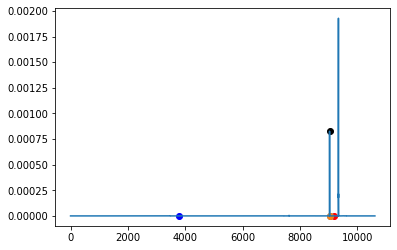

In [16]:
raw_path = 'los.00' + '{0:03}'.format(0) +'.raw'
distance, pec_vel, temp, HI_density, gas_density, gas_metallicity = unPackRawFile(raw_path)
peak,properties = find_peaks(HI_density)
prominences, left_bases, right_bases = peak_prominences(HI_density,find_peaks(HI_density)[0])
width = peak_widths(HI_density,find_peaks(HI_density)[0])
f,(ax) = plt.subplots(1,sharey=True, facecolor='w')
ax.plot(HI_density)
print(peak[2072])
print(left_bases[2072])
print(right_bases[2072])
ax.scatter(peak[2072],HI_density[9035],color = "black")
ax.scatter(left_bases[2072],0,color = 'blue')
ax.scatter(right_bases[2072],0,color = 'red')

ax.scatter(peak[2072]-width[0][2072]/2,0)
ax.scatter(peak[2072]+width[0][2072]/2,0)


(1.6, 1.7)

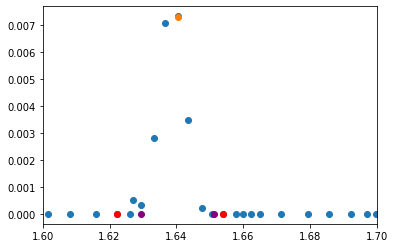

In [ ]:
raw_path = 'los.00' + '{0:03}'.format(2) +'.raw'
distance, pec_vel, temp, HI_density, gas_density, gas_metallicity = unPackRawFile(raw_path)
f,(ax) = plt.subplots(1,sharey=True, facecolor='w')
ax.scatter(distance,HI_density)
ax.scatter(1.64039,0.0073)
ax.scatter(1.62227,0,color ='red')
ax.scatter(1.65397,0,color = "red")
ax.scatter(1.62949,0,color = "purple")
ax.scatter(1.64039 - 1.62949 + 1.64039,0,color = "purple")
ax.set_xlim(1.6,1.7)
#purple is the min, green is the hanjue, base finding is wrong

(175.0, 177.0)

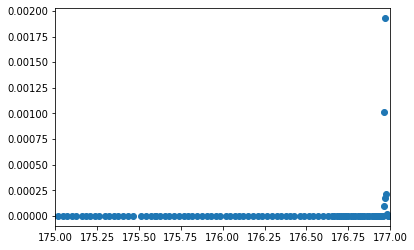

In [ ]:
raw_path = 'los.00' + '{0:03}'.format(0) +'.raw'
distance, pec_vel, temp, HI_density, gas_density, gas_metallicity = unPackRawFile(raw_path)
f,(ax) = plt.subplots(1,sharey=True, facecolor='w')
ax.scatter(distance,HI_density)

ax.set_xlim(175,177)
#purple is the min, green is the hanjue, base finding is wrong

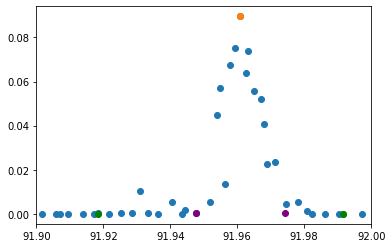

In [ ]:
raw_path = 'los.00' + '{0:03}'.format(4) +'.raw'
distance, pec_vel, temp, HI_density, gas_density, gas_metallicity = unPackRawFile(raw_path)
f,(ax) = plt.subplots(1,sharey=True, facecolor='w')
ax.scatter(distance,HI_density)
ax.set_xlim(91.9,92)
ax.scatter(91.96086,0.08957)
ax.scatter(91.91853,0,color = "green")
ax.scatter(91.99172,0, color = "green")
ax.scatter(91.94756,0.0002526,color = "purple")
ax.scatter(91.96086-91.94756 + 91.96086,0.0002526,color = "purple")

In [ ]:
def visual (count,true_peak, HI_density_value,true_base_left, true_base_right):
    raw_path = 'los.00' + '{0:03}'.format(count) +'.raw'
    distance, pec_vel, temp, HI_density, gas_density, gas_metallicity = unPackRawFile(raw_path)
    f,(ax) = plt.subplots(1,sharey=True, facecolor='w')
    ax.scatter(distance,HI_density)
    ax.scatter(true_peak,HI_density_value)
    #real
    ax.scatter(true_base_left,0,color = "green")
    ax.scatter(true_base_right,0, color = "green")
    #predicted


In [17]:
area

,id,xloc,NHI,left,right
0,0,172.16986,1.036595e+19,76.97643,173.84818
1,0,176.96167,2.752341e+18,76.97643,176.96482
2,1,118.63715,2.834530e+17,113.61964,122.21913
3,4,91.91853,2.077571e+17,10.89967,91.92178
4,4,98.40045,5.122052e+17,95.03354,126.54291
5,5,199.37549,1.057182e+18,142.82704,199.47153
6,7,69.04521,1.674213e+17,64.41570,79.42143


In [ ]:
len(lyman_limited_distance)

3752

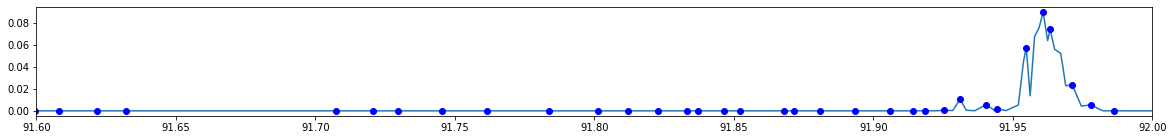

In [ ]:
raw_path = 'los.00' + '{0:03}'.format(4) +'.raw'
distance, pec_vel, temp, HI_density, gas_density, gas_metallicity = unPackRawFile(raw_path)
fig = plt.figure(figsize=(20, 2))
ax = fig.add_subplot(111)
ax.plot(distance,HI_density)
        #find peaks function from scipy after changing the width and prominence for better results, width is the bin? which is 1.75 chimps
peak,properties = find_peaks(HI_density)
ax.plot(distance[peak],HI_density[peak],'bo')
ax.set_xlim(91.6,92)
plt.show()

[ 14.1163   14.13133  14.13863  14.15447  26.96809  43.50519  65.73211
  70.41727  74.85522  76.99271  87.52548  87.56128  87.57283  87.58361
  89.91423  91.91406  91.91853  91.92522  91.93109  91.94041  91.94431
  91.95481  91.96337  91.97129  91.97811  91.9861   98.3885   98.40045
 105.81521 116.35881 116.67819 116.69586 116.7086  121.22183 123.69859
 131.78599 137.1068  139.50418 139.51866 139.54719 139.56333 139.61734
 142.44544 142.45991 142.46781 145.81518 146.27327 151.0195  158.02396]
[9.605e-07 9.549e-07 1.020e-06 1.052e-06 3.803e-07 2.171e-08 7.705e-08
 4.432e-08 2.329e-08 6.118e-08 4.464e-07 1.604e-06 2.263e-06 2.045e-06
 4.011e-08 4.472e-06 2.367e-04 4.099e-04 1.045e-02 5.617e-03 1.979e-03
 5.726e-02 7.387e-02 2.360e-02 5.521e-03 3.270e-05 2.063e-05 6.836e-05
 4.945e-06 1.736e-07 5.257e-07 1.158e-06 7.518e-07 1.058e-07 2.675e-08
 7.165e-08 3.825e-08 9.081e-07 9.500e-07 7.670e-07 5.344e-07 3.988e-07
 7.280e-07 2.417e-05 2.169e-03 2.886e-07 7.035e-08 5.236e-08 2.342e-07]
6.15

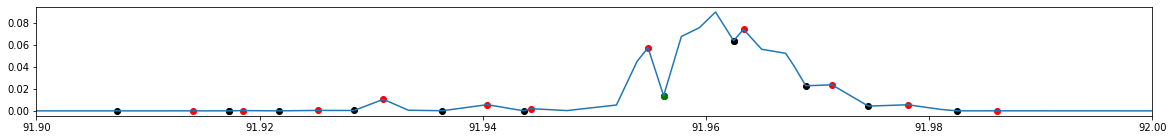

In [ ]:
raw_path = 'los.00' + '{0:03}'.format(4) +'.raw'
distance, pec_vel, temp, HI_density, gas_density, gas_metallicity = unPackRawFile(raw_path)
fig = plt.figure(figsize=(20, 2))
ax = fig.add_subplot(111)
ax.plot(distance,HI_density)
peak,properties = find_peaks(HI_density)
mins, properties =find_peaks(HI_density*-1)
distance_cm = distance*0.1474*3.086e24 /0.68
peak_find = []
closest_mins = [mins[np.argmin(np.abs(x-mins))] for x in peak]
for k,z,w,x in zip(peak,right_bases,left_bases,closest_mins):
        area_under_the_curve = np.multiply(HI_density[k], abs(distance_cm[k]- distance_cm[x]))/0.937415
#find peaks function from scipy after changing the width and prominence for better results, width is the bin? which is 1.75 chimps
        if(area_under_the_curve >= (1.6*10**15)and area_under_the_curve  <= (10**20)and HI_density[k]/(gas_density[k]) > 1e-4 ):
                peak_find.append(k) 

ax.set_xlim(91.90,92)
ax.scatter(distance[peak_find],HI_density[peak_find],color ='red')
ax.scatter(distance[closest_mins],HI_density[closest_mins],color = "black")
print(distance[peak_find])
print(HI_density[peak_find])
print(distance_cm[5872])
print(HI_density[5872])
print(gas_density[5872])
print(HI_density[5872]/gas_density[5872])
plt.scatter(distance[5873],HI_density[5873],color = "green")
print(distance_cm[5873])
plt.show()


In [18]:
area

,id,xloc,NHI,left,right
0,0,172.16986,1.036595e+19,76.97643,173.84818
1,0,176.96167,2.752341e+18,76.97643,176.96482
2,1,118.63715,2.834530e+17,113.61964,122.21913
3,4,91.91853,2.077571e+17,10.89967,91.92178
4,4,98.40045,5.122052e+17,95.03354,126.54291
5,5,199.37549,1.057182e+18,142.82704,199.47153
6,7,69.04521,1.674213e+17,64.41570,79.42143


In [62]:
display_all()


NameError: name 'display_all' is not defined

In [49]:
##the a-axis is the number of lyman-limited series, y-axis is the column density
lyman_limited_value_sorted = sorted(lyman_limited_value)
#below shows the total of lyman_limited_value in the nlos
len(lyman_limited_value_sorted)

2209

We got the data now, now is the data processing

We bin the data by distance first, by doing so, we can figure out the change in the number density Vs the column density:

In [50]:
##need to bin the data, and graph it like the paper.
##right here we are goin go bin the data, using panda
##find the max/min

min_value_lyman_limited_value = np.log10(min(lyman_limited_value_sorted))
max_value_lyman_limited_value = np.log10(max(lyman_limited_value_sorted))
print(min_value_lyman_limited_value)
print(max_value_lyman_limited_value)

17.204223680191465
21.96887137472149


In [51]:
##putting data into panda data_frame for better organization
##belows is the bin value
bins = np.linspace(min_value_lyman_limited_value,max_value_lyman_limited_value,51)
bins

array([17.20422368, 17.29951663, 17.39480959, 17.49010254, 17.5853955 ,
       17.68068845, 17.7759814 , 17.87127436, 17.96656731, 18.06186027,
       18.15715322, 18.25244617, 18.34773913, 18.44303208, 18.53832503,
       18.63361799, 18.72891094, 18.8242039 , 18.91949685, 19.0147898 ,
       19.11008276, 19.20537571, 19.30066867, 19.39596162, 19.49125457,
       19.58654753, 19.68184048, 19.77713344, 19.87242639, 19.96771934,
       20.0630123 , 20.15830525, 20.2535982 , 20.34889116, 20.44418411,
       20.53947707, 20.63477002, 20.73006297, 20.82535593, 20.92064888,
       21.01594184, 21.11123479, 21.20652774, 21.3018207 , 21.39711365,
       21.49240661, 21.58769956, 21.68299251, 21.77828547, 21.87357842,
       21.96887137])

In [52]:
##divide up the data 
bin_data = pd.DataFrame()
bin_data['cut_lyman_limited'] = np.array(lyman_limited_value_sorted)
bin_data['cut_lyman_limited'] = pd.cut(np.log10(bin_data['cut_lyman_limited']), bins = bins,include_lowest = True).astype(str)

below we visualize the number density vs column density without any normalization

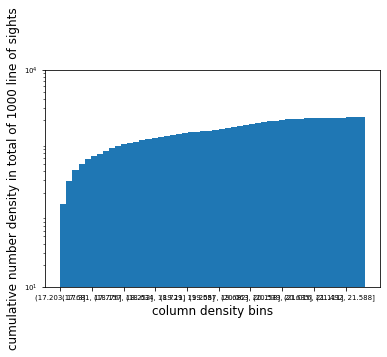

<Figure size 640x480 with 0 Axes>

In [53]:
##graph similar to the paper, culmulative
from matplotlib.pyplot import figure
fig, ax = plt.subplots()
hist = ax.hist(bin_data,bins=50,cumulative =1,log =True)
ax.set_xticks(ax.get_xticks()[::5])
ax.set_yticks(ax.get_yticks()[::3])
ax.set_xlabel('column density bins', fontsize=12)
ax.set_ylabel('cumulative number density in total of 1000 line of sights', fontsize=12)
ax.tick_params(axis='both', which='major', labelsize=7)
plt.figure(figsize=(8, 6), dpi=80)
plt.show()

In [54]:
##extract the change in column density counts
##abserve the trend that as the column density decreases the rate of number density decrease increase.
number_count = []
for i in range(1, len(hist[0])):
    number_count.append(hist[0][i]- hist[0][i-1])
total =0 
for i in number_count:
    total += i
number_count

[146.0,
 121.0,
 95.0,
 78.0,
 55.0,
 55.0,
 69.0,
 68.0,
 49.0,
 53.0,
 43.0,
 46.0,
 43.0,
 41.0,
 33.0,
 43.0,
 40.0,
 34.0,
 40.0,
 33.0,
 35.0,
 34.0,
 42.0,
 0.0,
 33.0,
 39.0,
 53.0,
 55.0,
 62.0,
 60.0,
 60.0,
 51.0,
 56.0,
 48.0,
 33.0,
 36.0,
 35.0,
 15.0,
 25.0,
 27.0,
 20.0,
 15.0,
 8.0,
 6.0,
 8.0,
 6.0,
 9.0,
 8.0,
 4.0]

number density over distance

In [55]:
# lyman_limited_counts
# distance_value =  np.linspace(0,100,100,endpoint = True)
# fig = plt.figure(figsize=(20, 2))
# ax = fig.add_subplot(111)
# ax.plot(distance_value, lyman_limited_counts)

In [56]:
# fig = plt.figure()
# ax = plt.axes(projection='3d')
# x,y,z =[],[],[]
# for i in range(37394):
#     x.append(lyman_limited_distance[i][0])
#     y.append(lyman_limited_distance[i][1])
#     z.append(lyman_limited_distance[i][2])
# ax.set_xlabel("distance alone los")
# ax.set_ylabel("number count for los")
# ax.set_zlabel("number count(N_hi)")
# ax.scatter3D(y,x,z,cmap='binary',s=0.05)

can I put this into the box

number density varies a lot

We will now reporduce figure one:

In [57]:
#we here find the change in column density
#d_N_column = bins[1] - bins[0]
d_N_column= []
for i in range(1,50):
    d_N_column.append(10**bins[i]-10**bins[i-1])
    


In [58]:
def aH_calc(aexp,OmegaM):
    aH = 100*aexp*np.sqrt(OmegaM/aexp**3+(1-OmegaM))
    return aH
aH = aH_calc(aexp=0.1433,OmegaM=0.3036)
print(aH)

146.04563456166113


In [59]:
#dN / (dz *dN_HI)
y_value = []
#dz = dv/c = H*dr/c = H*a*dx/c
#dx = 200cMpc * number of line of sights
dz = aH*(200*1000)/(3e5) 
for i,k in zip(number_count,d_N_column):
    if(number_count == 0):
        y_value.append(0)
    y_value.append(i/(dz*(k)))
print(dz)

97.36375637444075


In [60]:
x_value = []
for i in range(1,50):
    x_value.append(bins[i])

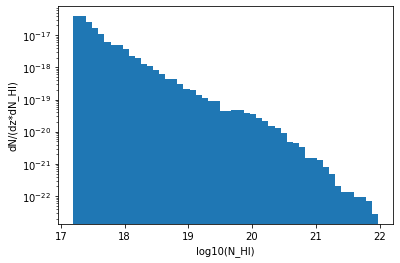

In [61]:
plt.bar(x_value,y_value,width = 0.2)
plt.xlabel("log10(N_HI)")
plt.ylabel("dN/(dz*dN_HI)")
plt.yscale('log')

tried to increase the peak prominence, results with curves. Paper has 10000 line of sights, shouldnt change anything